In [1]:
from fastai import *
from fastai.vision import *
from PIL import Image

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
path = Path('data/football-or-soccer/')

In [4]:
folder = 'american-football'
file = 'urls-american-football'

In [8]:
folder = 'soccer'
file = 'urls-soccer'

In [9]:
dest = path/'Train'/folder
dest.mkdir(parents=True, exist_ok = True)

In [10]:
dest

PosixPath('data/football-or-soccer/Train/soccer')

In [11]:
# Running twice with different combination of folder and file
download_images(path/file,dest)

Error https://cloud.rampinteractive.com/kelownayouthsoccer/files/tryout.jpg HTTPSConnectionPool(host='cloud.rampinteractive.com', port=443): Max retries exceeded with url: /kelownayouthsoccer/files/tryout.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')],)",),))
Error https://www.soccer.com/wcm/connect/5f0b0e03-9c96-40f6-a0bc-0c830df30e31/17390_SIDEKICKS-2UP-MEGAMENU.jpg?MOD=AJPERES&CACHEID=ROOTWORKSPACE-5f0b0e03-9c96-40f6-a0bc-0c830df30e31-mm9SgnZ HTTPSConnectionPool(host='www.soccer.com', port=443): Read timed out. (read timeout=4)
Error https://www.geegees.ca/sites/default/files/styles/medium/public/images/tax_dropin_image/Soccer.jpg?itok=BMJ20XW1 HTTPSConnectionPool(host='www.geegees.ca', port=443): Max retries exceeded with url: /sites/default/files/styles/medium/public/images/tax_dropin_image/Soccer.jpg?itok=BMJ20XW1 (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_proc

In [12]:
# Number of images downloaded
p_football = get_image_files(path/'Train'/'american-football')
p_soccer = get_image_files(path/'Train'/'soccer')
len(p_football),len(p_soccer)

(798, 819)

In [4]:
classes = ['american-football','soccer']

In [14]:
# Checking for corrupt images and deleting them
for c in classes:
    print(c)
    verify_images(path/'Train'/c, delete=True)

american-football


Image data/football-or-soccer/Train/american-football/00000548.png has 4 instead of 3
cannot identify image file <_io.BufferedReader name='data/football-or-soccer/Train/american-football/00000631.jpg'>
Image data/football-or-soccer/Train/american-football/00000457.png has 4 instead of 3
cannot identify image file <_io.BufferedReader name='data/football-or-soccer/Train/american-football/00000426.jpg'>
Image data/football-or-soccer/Train/american-football/00000060.png has 4 instead of 3
cannot identify image file <_io.BufferedReader name='data/football-or-soccer/Train/american-football/00000082.jpg'>
cannot identify image file <_io.BufferedReader name='data/football-or-soccer/Train/american-football/00000808.jpg'>
Image data/football-or-soccer/Train/american-football/00000291.png has 4 instead of 3
Image data/football-or-soccer/Train/american-football/00000664.png has 4 instead of 3
cannot identify image file <_io.BufferedReader name='data/football-or-soccer/Train/american-football/00000

cannot identify image file <_io.BufferedReader name='data/football-or-soccer/Train/soccer/00000023.jpg'>
cannot identify image file <_io.BufferedReader name='data/football-or-soccer/Train/soccer/00000755.jpg'>
cannot identify image file <_io.BufferedReader name='data/football-or-soccer/Train/soccer/00000243.jpg'>
Image data/football-or-soccer/Train/soccer/00000778.png has 4 instead of 3
Image data/football-or-soccer/Train/soccer/00000140.png has 4 instead of 3
cannot identify image file <_io.BufferedReader name='data/football-or-soccer/Train/soccer/00000734.jpg'>
cannot identify image file <_io.BufferedReader name='data/football-or-soccer/Train/soccer/00000399.jpg'>
cannot identify image file <_io.BufferedReader name='data/football-or-soccer/Train/soccer/00000435.jpg'>
Image data/football-or-soccer/Train/soccer/00000410.png has 2 instead of 3
Image data/football-or-soccer/Train/soccer/00000709.png has 4 instead of 3
cannot identify image file <_io.BufferedReader name='data/football-or-

In [15]:
# Number of images remaining 
p_football = get_image_files(path/'Train'/'american-football')
p_soccer = get_image_files(path/'Train'/'soccer')
len(p_football),len(p_soccer)

(722, 763)

In [44]:
# Defining a databunch
# 20% Validation at random
np.random.seed(20)
data = ImageDataBunch.from_folder(path,train='Train',valid_pct=0.2,
                                  ds_tfms = get_transforms(),size = 299,bs=64,
                                 num_workers = 8)
data.normalize(imagenet_stats);

In [45]:
# Sanity Check
data.classes, data.c

(['american-football', 'soccer'], 2)

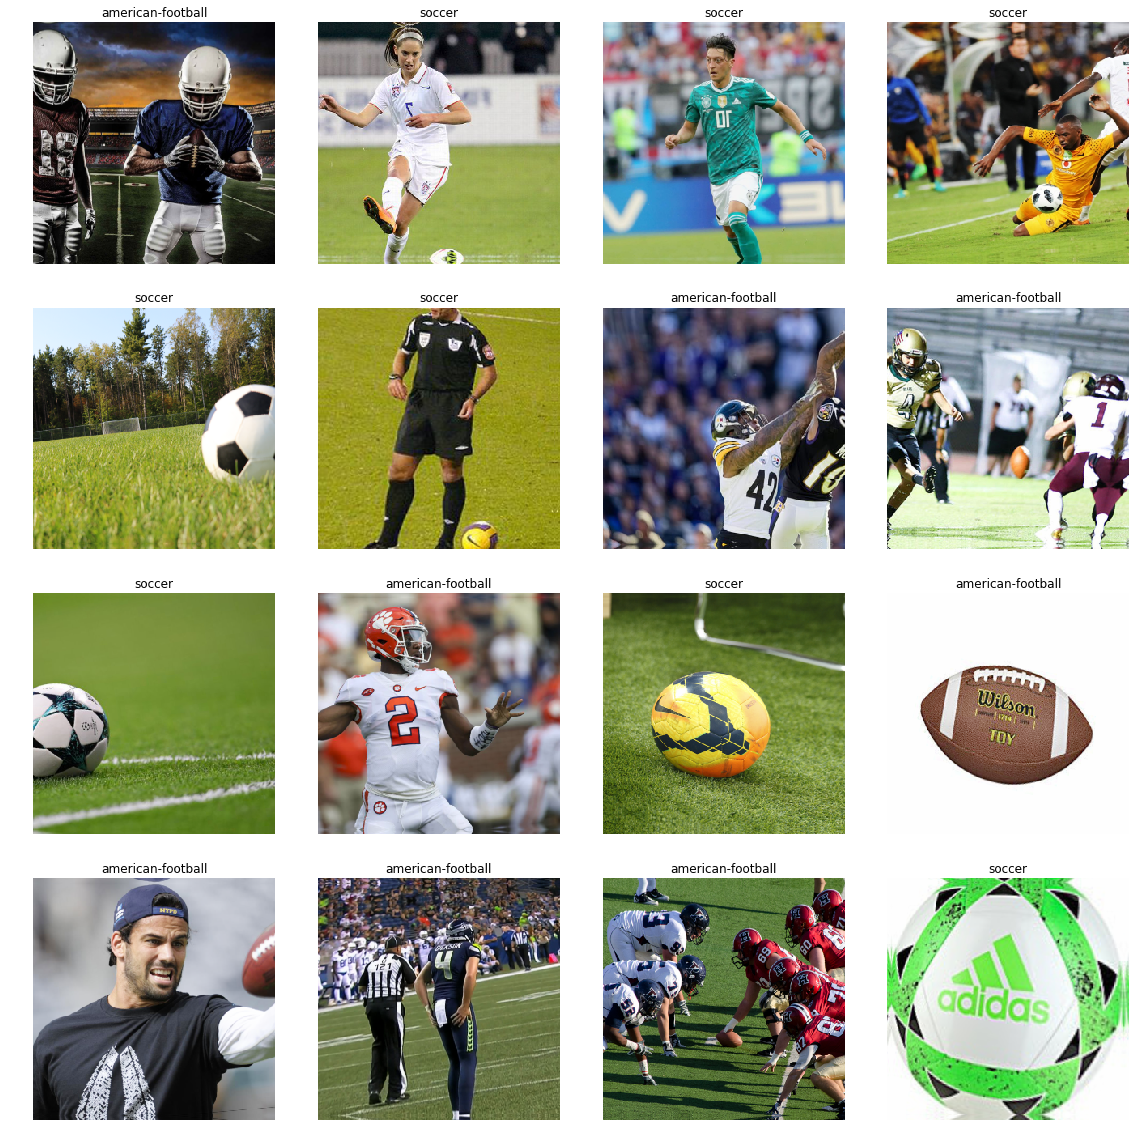

In [41]:
# Displaying a few images with ground labels
data.show_batch(rows=4)

In [52]:
# Defining the model resnet34 and metrics
learn = create_cnn(data, models.resnet34, metrics = accuracy)

In [48]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


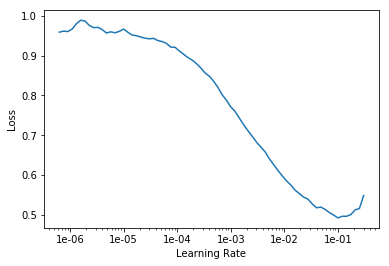

In [49]:
# Plotting the graph
learn.recorder.plot()

In [12]:
lr = 1e-2

In [54]:
# One cycle policy with 6 epochs
learn.fit_one_cycle(6,slice(lr))

In [55]:
learn.save('stage-1')

In [57]:
learn.load('stage-1');

In [58]:
# Unfreezing the resnet architecture
learn.unfreeze()

In [59]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


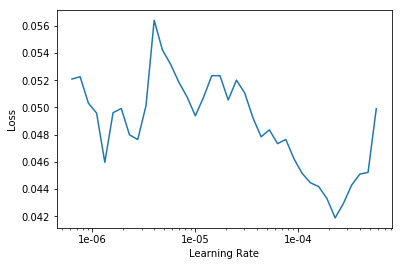

In [61]:
learn.recorder.plot(skip_end=10)

In [62]:
# Discriminative learning rates
lrs = slice(3e-5,lr/5)

In [63]:
# training using discriminative learning rates
learn.fit_one_cycle(7,lrs)

In [64]:
# Interpreting the results
interp = ClassificationInterpretation.from_learner(learn)

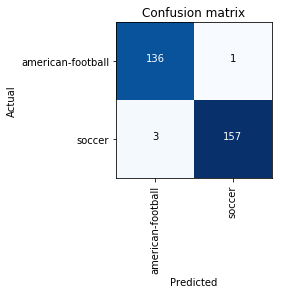

In [65]:
interp.plot_confusion_matrix()

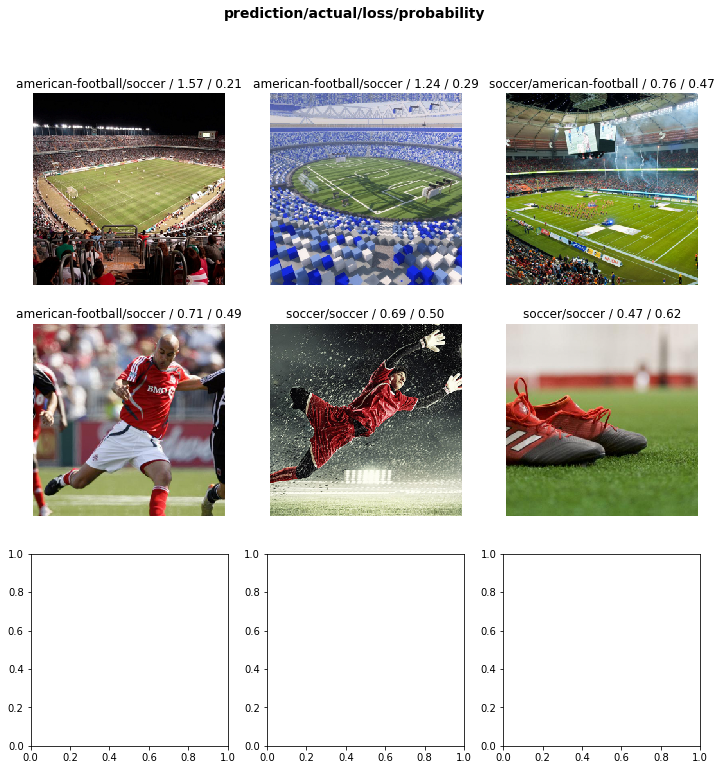

In [68]:
# Plotting the top 6 losses
interp.plot_top_losses(6)

In [6]:
# Trying a bigger model renet50

In [4]:
# Data bunch
# Reducing the batch size
np.random.seed(23)
data = ImageDataBunch.from_folder(path,train='Train',valid_pct=0.2,
                                  ds_tfms = get_transforms(),size = 299,
                                 bs=20 ,num_workers = 8)
data.normalize(imagenet_stats);

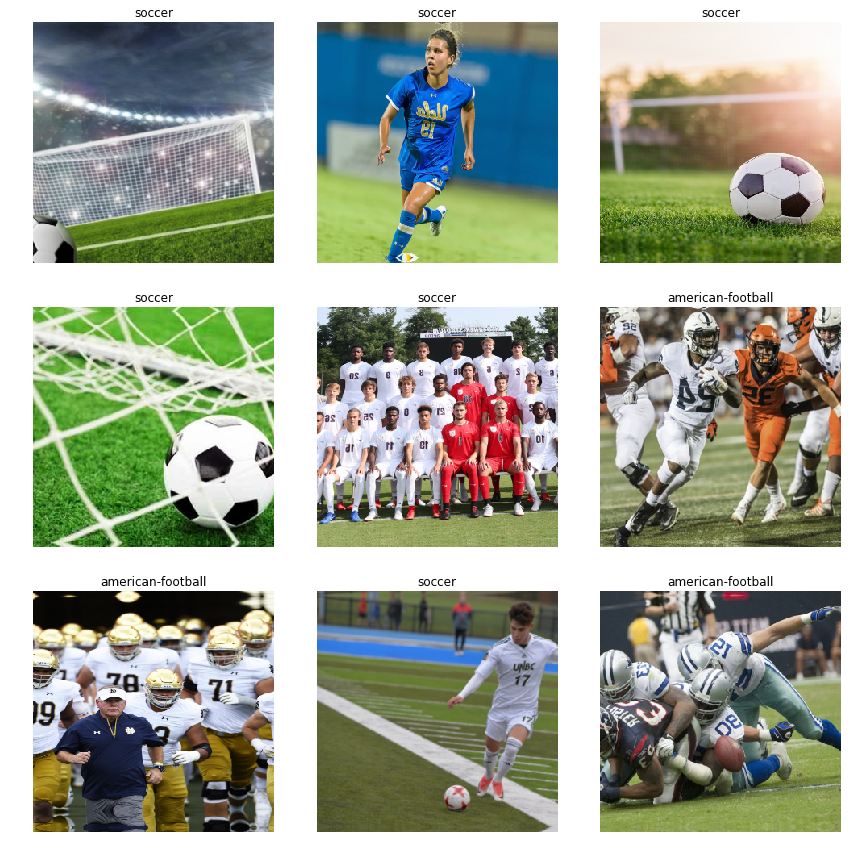

In [5]:
# Displaying a few images with ground labels
data.show_batch(3)

In [7]:
# Resnet50 architecture
learn = create_cnn(data, models.resnet50, metrics=accuracy)

In [8]:
# Following similar steps

In [7]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


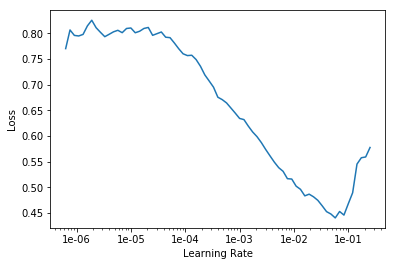

In [8]:
learn.recorder.plot()

In [11]:
lr = 5e-3

In [12]:
learn.fit_one_cycle(7)

In [13]:
learn.save('stage-1-50')

In [25]:
learn.load('stage-1-50');

In [26]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


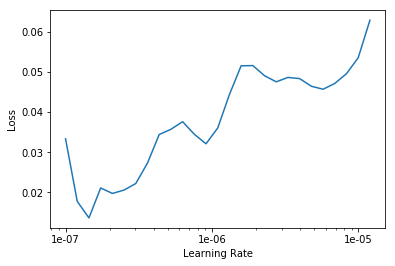

In [27]:
learn.recorder.plot(skip_start=0,skip_end=0)

In [27]:
lrs = slice(1e-7,lr/7)

In [28]:
learn.fit_one_cycle(7,lrs)

In [32]:
learn.save('stage-2-50')

In [34]:
learn.load('stage-2-50');

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

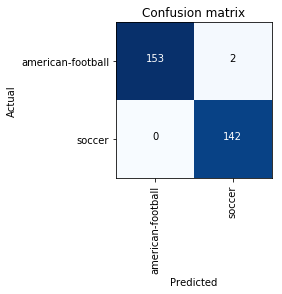

In [30]:
interp.plot_confusion_matrix()

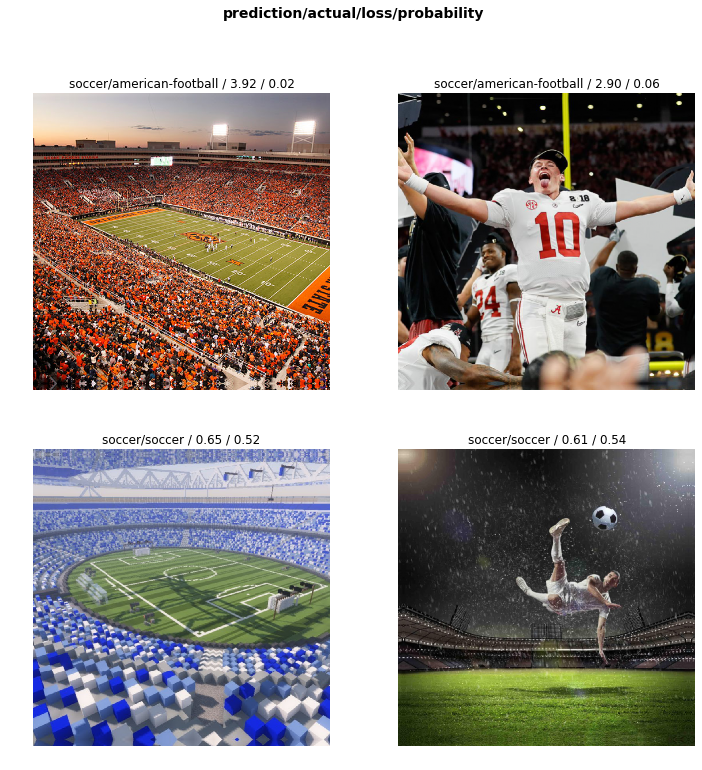

In [31]:
interp.plot_top_losses(4)

In [36]:
# Trying out the model on unseen data

In [35]:
# Empty data loader 
classes = ['american-football','soccer']
data2 = ImageDataBunch.single_from_classes(path,classes,tfms = get_transforms()
                                          ,size = 299).normalize(imagenet_stats)
learn = create_cnn(data2,models.resnet50)
learn.load('stage-1-50');

In [37]:
image_path = path.parent/'test-img'

In [38]:
imgs = image_path.ls()
len(imgs)

6

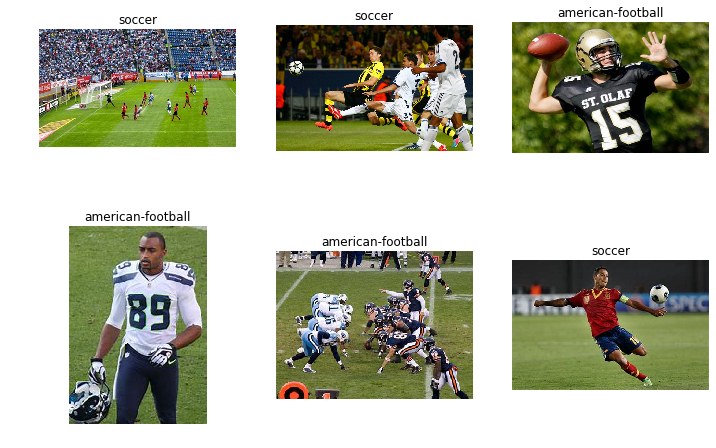

In [39]:
# Displaying the images with the predicted labels
width = min(math.ceil(len(imgs)/2),6)
height = math.ceil(len(imgs)/width)
fig = plt.figure(figsize=(width*4,height*4))
for i,file in enumerate(imgs):
    fig.add_subplot(height,width,i+1)
    plt.imshow(plt.imread(file))
    plt.axis('off')
    img = open_image(file)
    pred_class,_,_ = learn.predict(img)
    plt.title(pred_class)
       